<a href="https://colab.research.google.com/github/mustafadonder/MD/blob/master/dataAnalysisFirstProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !cp /content/AB_NYC_2019.csv -r /content

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
sns.set(rc={"figure.figsize":(20, 10)})

In [ ]:
df = pd.read_csv("AB_NYC_2019.csv", delimiter=",", encoding="UTF-8")
df.head()

In [ ]:
df.drop(["name", "id", "host_id", "host_name"], inplace=True, axis=1)
df.head()

In [5]:
integers = ["minimum_nights","number_of_reviews", "calculated_host_listings_count", "availability_365"]

for column in integers:
  df[column] = pd.to_numeric(df[column], errors="coerce")

  max_value = (3*df[column].std()) + df[column].mean()  # finds the max value that is not going to be called not an outlier
  min_value = -((3*df[column].std()) + df[column].mean())  # finds the min value that is not going to be called not an outlier

  mean = df.loc[(df[column] > min_value) & (df[column] < max_value), column].mean()  # calculate the new mean of the column without the outlier values

  # if there is no outlier value then the mean will be np.nan in this situation don't need to do imputation
  if mean is not np.nan:
    df.loc[(df[column] < min_value) | (df[column] > max_value), column] = mean  # change outlier values with mean
    df[column].fillna(mean, inplace=True)  # also fill nan values with mean
  else:  # this condition means there is no outlier value in the column
    df[column].fillna(df[column].mean(), inplace=True)  # just fill nan values with mean

  df[column] = df[column].astype("int64")  # the type will be converted to int64

In [ ]:
df.info()

In [ ]:
sns.histplot(df["price"], kde=True)

In [8]:
floats = ["price", "reviews_per_month", "calculated_host_listings_count", "latitude", "longitude"]

for column in floats:
  df[column] = pd.to_numeric(df[column], errors="coerce")

  max_value = (3*df[column].std()) + df[column].mean()  # finds the max value that is not going to be called not an outlier
  min_value = -((3*df[column].std()) + df[column].mean())  # finds the min value that is not going to be called not an outlier

  mean = df.loc[(df[column] > min_value) & (df[column] < max_value), column].mean()  # calculate the new mean of the column without the outlier values

  # if there is no outlier value then the mean will be np.nan in this situation don't need to do imputation
  if mean is not np.nan:
    df.loc[(df[column] < min_value) | (df[column] > max_value), column] = mean  # change outlier values with mean
    df[column].fillna(mean, inplace=True)  # also fill nan values with mean
  else:  # this condition means there is no outlier value in the column
    df[column].fillna(df[column].mean(), inplace=True)  # filling NA values with mean

  df[column] = df[column].astype("float64") #converting the type to int64

In [ ]:
df.info()

In [ ]:
sns.histplot(df["price"], kde=True)

In [ ]:
df.groupby("room_type")["room_type"].value_counts()

In [ ]:
for key, value in df.groupby(by="room_type")["room_type"].value_counts().items():
  if value==1:
    df.loc[df["room_type"]==key[0], "room_type"] = "unknown_type"

df.groupby(by="room_type")["room_type"].value_counts()

In [ ]:
df.isna().sum()

In [ ]:
df.head()

In [ ]:
df.info()

In [15]:
object_columns = df.select_dtypes("object").columns
object_columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'], dtype='object')

In [16]:
for column in object_columns:
  df[column] = df[column].astype("category")

In [ ]:
df.info()

In [ ]:
df.describe().T

In [17]:
df.pivot_table(values=["number_of_reviews", "availability_365", "price"],
               columns="room_type",
               aggfunc=np.mean)

room_type,Entire home/apt,Private room,Shared room
availability_365,111.920304,111.203933,162.000862
number_of_reviews,18.323704,18.215802,14.442241
price,190.404829,83.722141,66.252576


In [18]:
df.to_csv("airbnb_nyc_preprocessed.csv")

In [ ]:
df.dtypes.value_counts().plot.bar().set_title("Data Types Graph")

In [ ]:
sns.set(rc={'figure.figsize':(20,40)})
sns.barplot(x="price", y="neighbourhood", hue="room_type", data=df).set_title("Price VS Neighbourhood by Room Type")

In [ ]:
sns.set(rc={'figure.figsize':(50,40)})
sns.barplot(x="number_of_reviews", y="price", data=df).set_title("Price VS Number of Reviews")

In [ ]:
sns.set(rc={'figure.figsize':(50,40)})
sns.barplot(x="minimum_nights", y="price", hue="room_type", data=df).set_title("Price VS Minimum Nights by Room Type")

In [ ]:
cols = ["number_of_reviews", "room_type", "minimum_nights"]

for col in cols:
  plt.figure(figsize=(10,10))
  sns.scatterplot(x=col, y="price", data=df)

In [ ]:
sns.histplot(df["price"], kde=True,bins=40) # bins= auto

In [ ]:
(sns.FacetGrid(df, hue="room_type", height=5, xlim=(0, 500)).map(sns.kdeplot, "price", shade=True).add_legend())

<ipython-input-22-c078bb934990>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


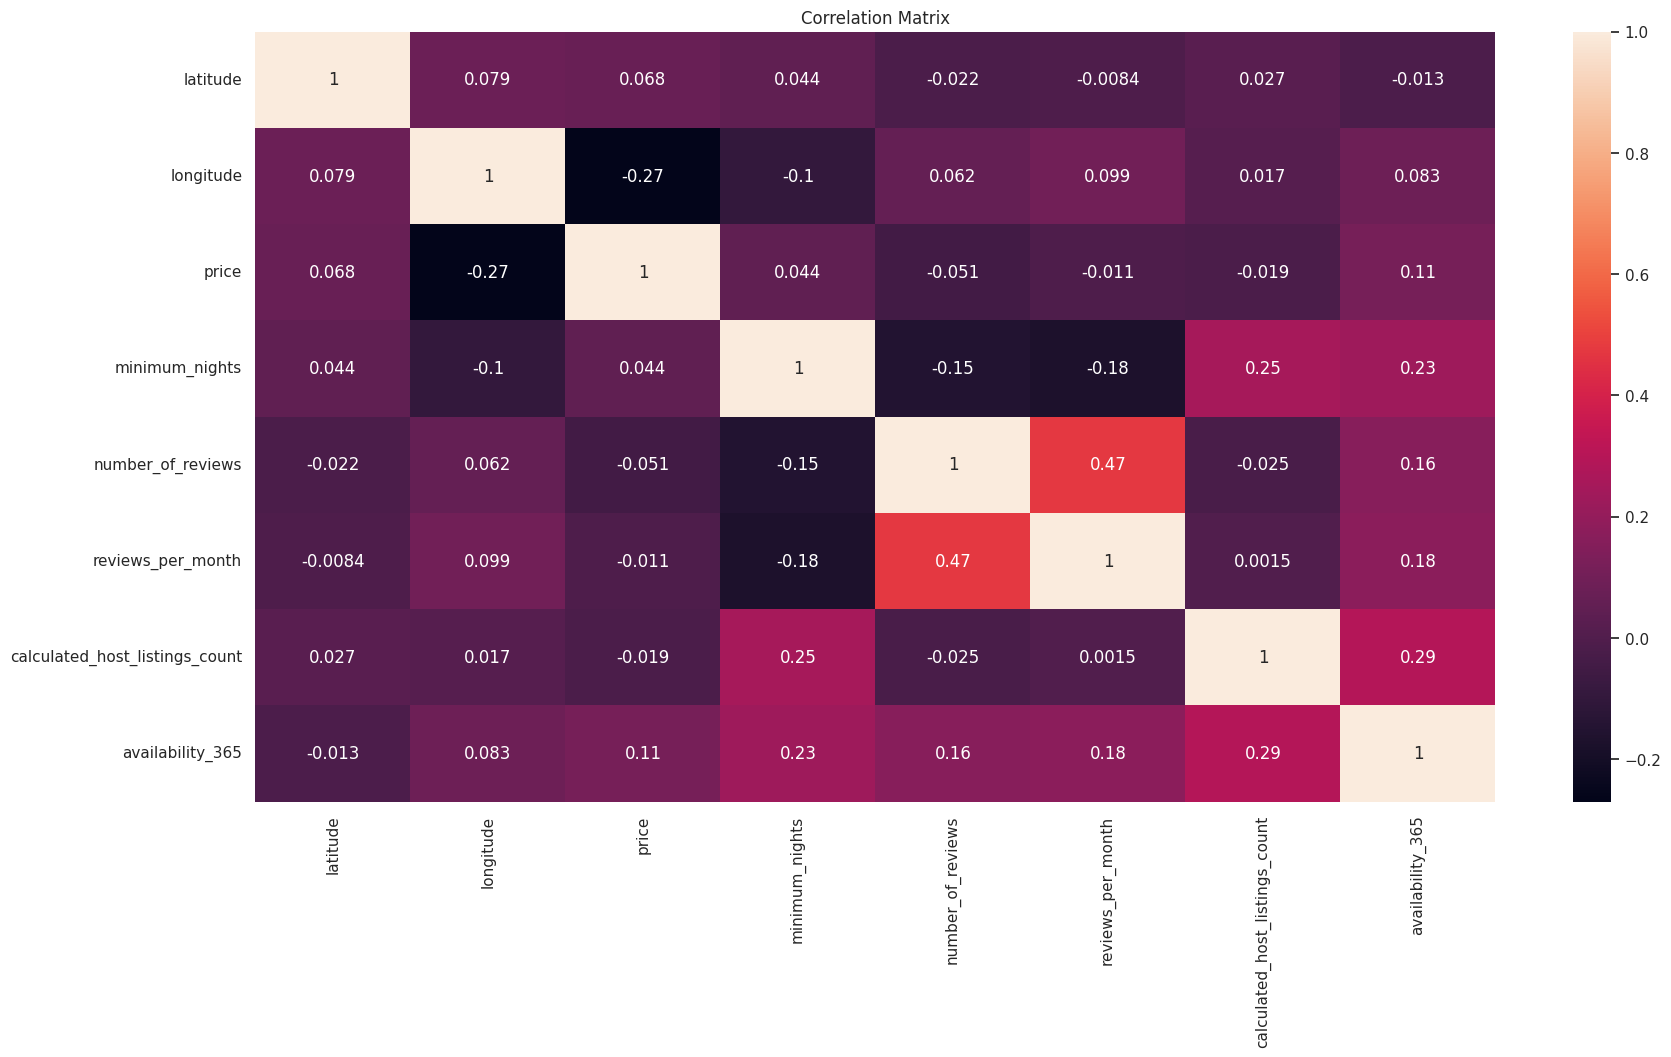

In [22]:
plt.title("Correlation Matrix")
sns.heatmap(df.corr(), annot=True);